In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 100000 Sales Records.xlsx to 100000 Sales Records (1).xlsx


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import time
import psutil  # This library helps to get memory usage


# Read data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')
df.head(100000)



,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,2012-08-26,836322486,2012-09-11,5263,205.70,117.11,1082599.10,616349.93,466249.17
99996,Europe,Poland,Meat,Offline,C,2013-12-03,110449349,2013-12-10,3272,421.89,364.69,1380424.08,1193265.68,187158.40
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,2013-08-07,193128764,2013-08-31,9948,109.28,35.84,1087117.44,356536.32,730581.12
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,2011-06-28,701597058,2011-07-03,7015,437.20,263.33,3066958.00,1847259.95,1219698.05


In [14]:
import pandas as pd

# Load the data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Check the dimensions (shape) of the DataFrame
data_dimensions = df.shape
print("Dimensions (rows, columns):", data_dimensions)

# Check the size of the DataFrame
data_size = df.size
print("Size:", data_size)

Dimensions (rows, columns): (100000, 14)
Size: 1400000


In [15]:
import pandas as pd

# Load the data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Identify categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns

# Initialize counters for nominal and ordinal variables
nominal_count = 0
ordinal_count = 0

# Check the type of each categorical variable
for var in categorical_variables:
    unique_values = df[var].nunique()
    if unique_values > 10:
        ordinal_count += 1
    else:
        nominal_count += 1

print("Number of nominal variables:", nominal_count)
print("Number of ordinal variables:", ordinal_count)


Number of nominal variables: 3
Number of ordinal variables: 2


In [18]:
import pandas as pd

# Load the data
df = pd.read_excel('100000 Sales Records.xlsx')

# Identify non-categorical variables
non_categorical_variables = df.select_dtypes(include=['number', 'datetime']).columns.tolist()

# Display the non-categorical variables
print("Non-categorical variables:")
for var in non_categorical_variables:
    print("-", var)


Non-categorical variables:
- Order Date
- Order ID
- Ship Date
- Units Sold
- Unit Price
- Unit Cost
- Total Revenue
- Total Cost
- Total Profit


In [19]:
import pandas as pd

# Load the data
df = pd.read_excel('100000 Sales Records.xlsx')

# Define categorical variables
categorical_variables = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

# Calculate frequency and relative frequency
for var in categorical_variables:
    print(f"\n{var}:")
    frequency = df[var].value_counts()
    relative_frequency = df[var].value_counts(normalize=True)
    print("Frequency:")
    print(frequency)
    print("\nRelative Frequency:")
    print(relative_frequency)



Region:
Frequency:
Sub-Saharan Africa                   26019
Europe                               25877
Asia                                 14547
Middle East and North Africa         12580
Central America and the Caribbean    10731
Australia and Oceania                 8113
North America                         2133
Name: Region, dtype: int64

Relative Frequency:
Sub-Saharan Africa                   0.26019
Europe                               0.25877
Asia                                 0.14547
Middle East and North Africa         0.12580
Central America and the Caribbean    0.10731
Australia and Oceania                0.08113
North America                        0.02133
Name: Region, dtype: float64

Country:
Frequency:
Sudan           623
New Zealand     593
Vatican City    590
Malta           589
Mozambique      589
               ... 
Switzerland     504
Ghana           500
Nigeria         499
Jamaica         494
Angola          489
Name: Country, Length: 185, dtype: int64

Rela

In [16]:
import pandas as pd

# Load the data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Select non-categorical variables
non_categorical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Cost', 'Total Profit']

# Compute measures of central tendencies
central_tendencies = df[non_categorical_columns].agg(['mean', 'median', lambda x: x.mode().iloc[0]])

# Rename the lambda function to 'mode'
central_tendencies = central_tendencies.rename({'<lambda>': 'mode'})

print("Measures of Central Tendencies for Non-Categorical Variables:")
print(central_tendencies)


Measures of Central Tendencies for Non-Categorical Variables:
        Units Sold  Unit Price   Unit Cost    Total Cost  Total Profit
mean    5001.44617  266.703989  188.019711  9.419755e+05  3.940912e+05
median  5007.00000  205.700000  117.110000  4.679374e+05  2.836575e+05
mode     172.00000  651.210000  524.960000  2.373657e+06  1.567264e+06


In [17]:
import pandas as pd

# Load the data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Get the index values
index_values = df.index

print("Index Values:")
print(index_values)


Index Values:
RangeIndex(start=0, stop=100000, step=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

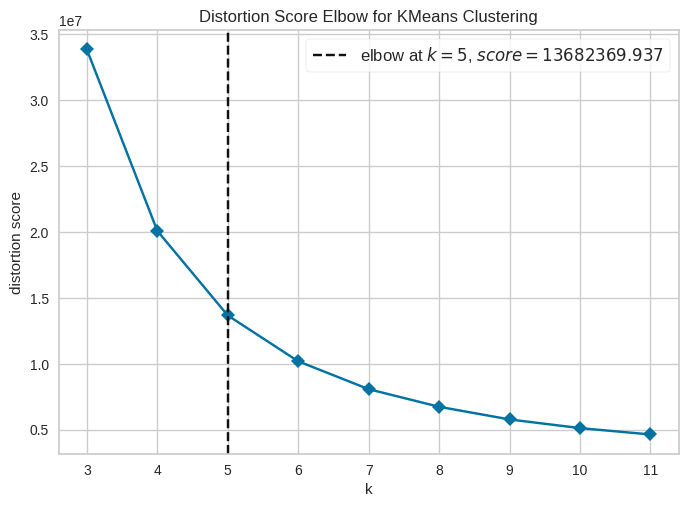

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


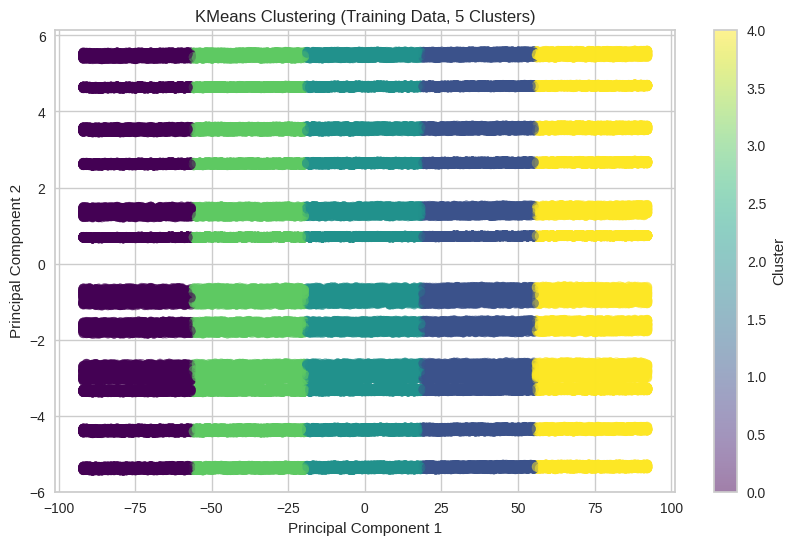

Number of Clusters: 5
Training Time: 1.247420072555542 seconds
Training Memory Usage: 446.265625 MB
Training Silhouette Score: 0.5018057464640253
Training Davies-Bouldin Score: 0.5843213151541042




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


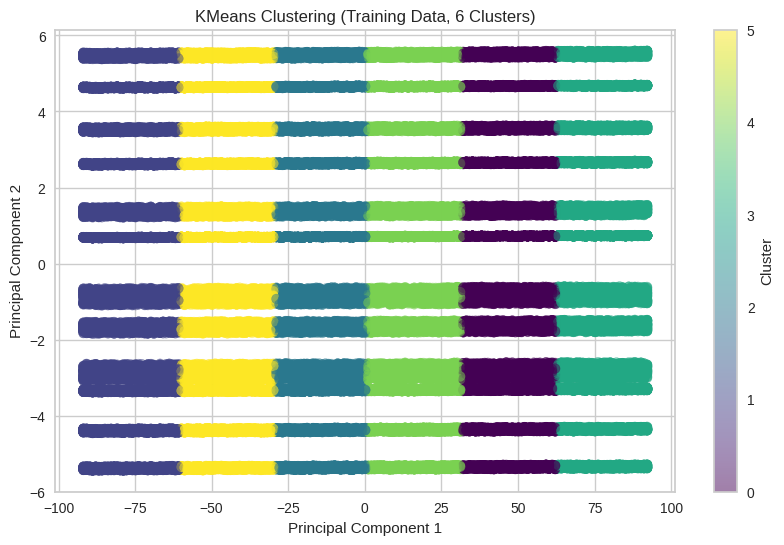

Number of Clusters: 6
Training Time: 1.3261768817901611 seconds
Training Memory Usage: 446.265625 MB
Training Silhouette Score: 0.4781303675499429
Training Davies-Bouldin Score: 0.6120247159742616




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


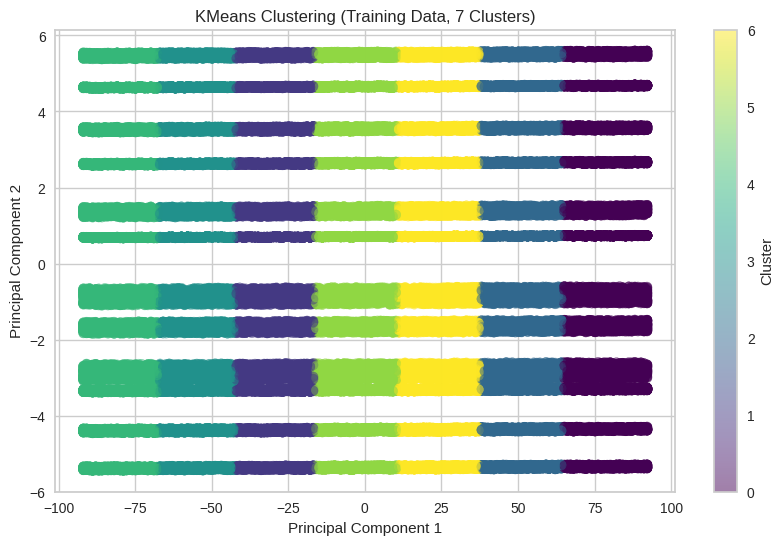

Number of Clusters: 7
Training Time: 1.4787836074829102 seconds
Training Memory Usage: 446.265625 MB
Training Silhouette Score: 0.4563811625967295
Training Davies-Bouldin Score: 0.6424081296519112




In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import time
import psutil
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# Define a function to print memory usage
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024**2  # Memory usage in MB

# Define function to perform KMeans clustering
def perform_kmeans(X_train, num_clusters):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Record start time
    start_time = time.time()

    # Fit KMeans to the training data
    kmeans.fit(X_train)

    # Record end time and calculate the training time
    end_time = time.time()
    training_time = end_time - start_time

    # Get the cluster labels for the training data
    train_clusters = kmeans.labels_

    # Evaluate clustering performance using silhouette score and Davies-Bouldin score
    train_silhouette = silhouette_score(X_train, train_clusters)
    train_db_score = davies_bouldin_score(X_train, train_clusters)

    # Get memory usage after fitting the model
    train_memory = get_memory_usage()

    return train_clusters, training_time, train_memory, train_silhouette, train_db_score

# Read data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Drop unnecessary columns
columns_to_drop = ['Order Date', 'Order ID', 'Ship Date']
df = df.drop(columns=columns_to_drop)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['Unit Price', 'Unit Cost']] = imputer.fit_transform(df[['Unit Price', 'Unit Cost']])

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Handle remaining missing values (if any)
df = df.dropna()

# Standardize numerical features
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split the data into features and labels
X = df.drop(columns=['Total Profit'])  # Features
y = df['Total Profit']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Apply the elbow method to find the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(3, 12), timings=False)
visualizer.fit(X)
visualizer.show()

# List of different values of k to explore
k_values = [5, 6, 7]

for k in k_values:
    # Perform k-means clustering on the training set with the current value of k
    train_clusters, train_time, train_memory, train_silhouette, train_db_score = perform_kmeans(X_train, num_clusters=k)

    # Plot the KMeans clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_clusters, cmap='viridis', alpha=0.5)
    plt.title(f'KMeans Clustering (Training Data, {k} Clusters)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    # Print results
    print(f"Number of Clusters: {k}")
    print(f"Training Time: {train_time} seconds")
    print(f"Training Memory Usage: {train_memory} MB")
    print(f"Training Silhouette Score: {train_silhouette}")
    print(f"Training Davies-Bouldin Score: {train_db_score}")
    print("\n")

